# **Universal Quantum Computing framework**

1) The Universal Quantum Computing (UQC) framework provides a structured enterprise-grade model for processing client orders into customized quantum deliverables. It integrates relativistic and non-relativistic quantum computation classes, theoretical mappings (Dirac, Schrödinger, Lindblad, Feynman diagrams, Spin-Foam models), and enterprise-level operations (QAI Ops, Business Transformation, compliance, packaging).

2) This framework aligns with the vision of a true universal machine capable of computation + communication tasks, adhering to requirements of Grand Unified Theory (GUT), Theory of Everything (ToE), and enterprise operational standards


[Phase 1] Order received: ORD-1757926832
[Phase 2] Class selected: relativistic
[Phase 3] Knowledge mapping: ['Dirac (ref)', 'Lindblad (open system)']
[Phase 4] Pipeline composed: PIPE-1757926832
[Phase 5] Allocation: sim-srv-01
[Phase 6] Execution done. final_fidelity: 0.46777372255232286


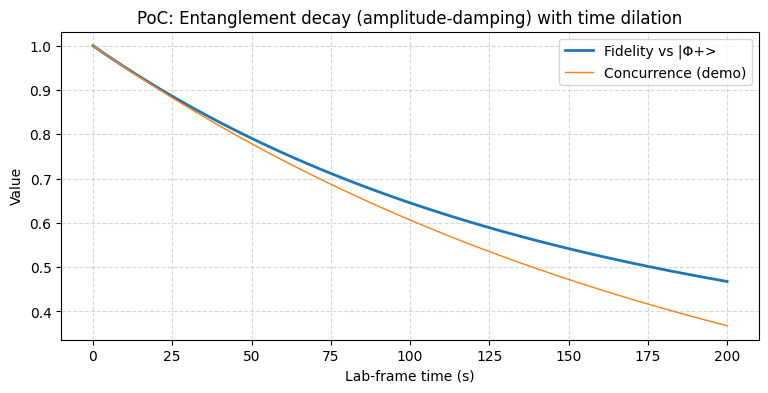

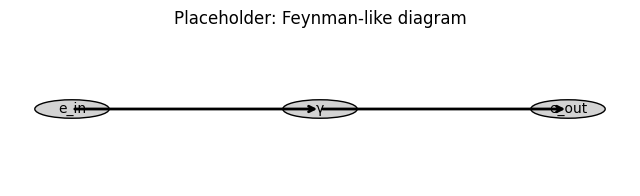

[Phase 7] Iter 1, fidelity=0.4678, threshold=0.6
[Phase 6] Execution done. final_fidelity: 0.46777372255232286


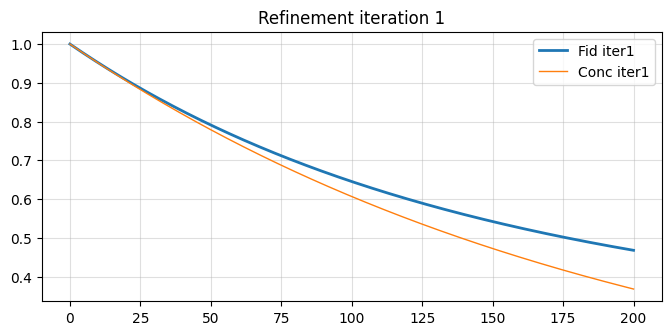

[Phase 7] Iter 2, fidelity=0.4678, threshold=0.6
[Phase 6] Execution done. final_fidelity: 0.46777372255232286


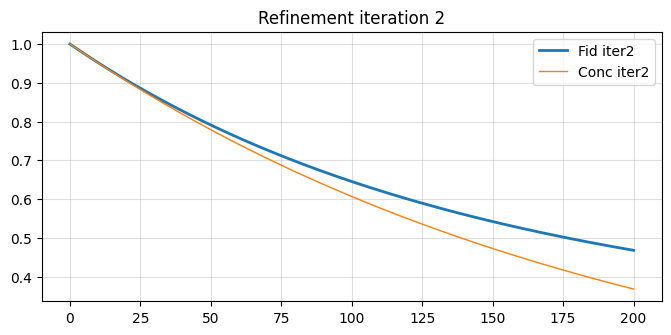

[Phase 8] Package created: PKG-1757926833


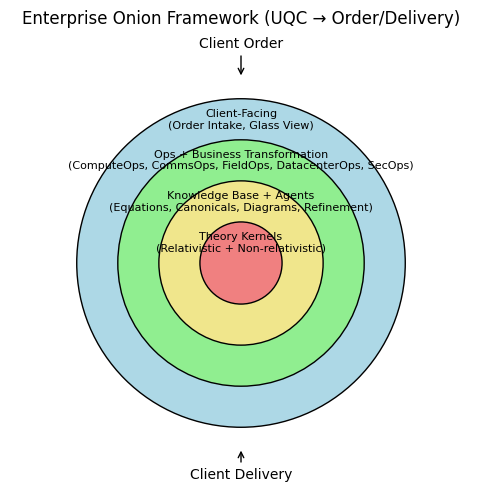

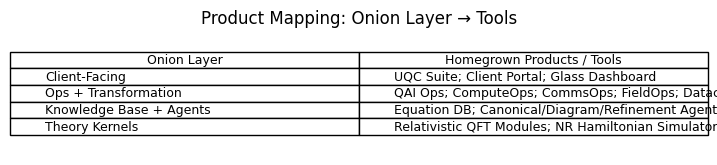

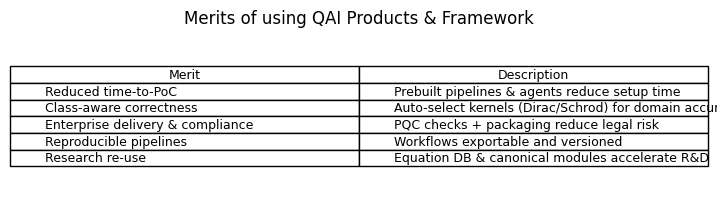


=== FINAL DELIVERABLE SUMMARY ===
Order ID: ORD-1757926832
Package ID: PKG-1757926833
Final metrics (excerpt):
{
  "gamma": 1.0000007200007777,
  "Gamma_eff": 0.009999992799997408,
  "final_fidelity": 0.46777372255232286
}
Visuals displayed above. All artifacts saved in folder: deliverable_bundle



In [5]:
# Universal Quantum Computing framework based order delivery (simple matplotlib visuals)
# Single-cell pipeline: Order -> Knowledge mapping -> Workflow -> Execution -> Refinement -> Packaging
# Uses only numpy + matplotlib + standard libs. No widgets, no networkx, no pandas.
# Run in Colab as one cell.

import os, json, shutil, math
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timezone

# -----------------------------
# Setup: output folder and helpers
# -----------------------------
OUT_DIR = "deliverable_bundle"
if os.path.exists(OUT_DIR):
    shutil.rmtree(OUT_DIR)
os.makedirs(OUT_DIR, exist_ok=True)

def save_json(obj, path):
    with open(path, "w") as f:
        json.dump(obj, f, indent=2)

def now_ts():
    return datetime.now(timezone.utc).isoformat()

def kron(*mats):
    out = np.array([1.0])
    for m in mats:
        out = np.kron(out, m)
    return out

# Basic quantum state definitions (small, self-contained)
I2 = np.eye(2, dtype=complex)
zero_vec = np.array([1,0], dtype=complex)
one_vec  = np.array([0,1], dtype=complex)
bell = (np.kron(zero_vec, zero_vec) + np.kron(one_vec, one_vec)) / np.sqrt(2)
rho_bell = np.outer(bell, bell.conj())

# -----------------------------
# PHASE 1: Order Intake
# -----------------------------
def intake_order(client_id, application, notes, params):
    order = {
        "order_id": f"ORD-{int(datetime.now(timezone.utc).timestamp())}",
        "client_id": client_id,
        "title": "Universal Quantum Computing framework based order delivery",
        "application": application,
        "notes": notes,
        "params": params,
        "received_at": now_ts()
    }
    save_json(order, os.path.join(OUT_DIR, "order.json"))
    print("[Phase 1] Order received:", order["order_id"])
    return order

client_params = {
    "class_hint": "relativistic",
    "satellite_velocity_fraction_of_c": 0.0012,
    "base_decoherence_rate_Gamma_per_s": 0.01,
    "simulation_duration_s": 200.0,
    "time_steps": 200,
    "fidelity_threshold": 0.6
}
order = intake_order("CLIENT-SPACE-001", "satellite_quantum_comm",
                     "Simulate entanglement distribution under relativistic motion and radiation noise.",
                     client_params)

# -----------------------------
# PHASE 2: Class Selection & Validation
# -----------------------------
def class_selection(order):
    hint = order["params"].get("class_hint","non-relativistic")
    if "relativ" in hint.lower():
        cls = "relativistic"
    else:
        cls = "non-relativistic"
    ticket = {
        "job_ticket_id": f"TICK-{int(datetime.now(timezone.utc).timestamp())}",
        "selected_class": cls,
        "validated_at": now_ts()
    }
    save_json(ticket, os.path.join(OUT_DIR, "job_ticket.json"))
    print("[Phase 2] Class selected:", cls)
    return ticket

ticket = class_selection(order)

# -----------------------------
# PHASE 3: Knowledge Mapping (simple)
# -----------------------------
def knowledge_map(ticket):
    if ticket["selected_class"] == "relativistic":
        equations = ["Dirac (ref)", "Lindblad (open system)"]
        canonical = "Path Integral + Density Matrix"
    else:
        equations = ["Schrödinger", "Lindblad"]
        canonical = "Hamiltonian formalism"
    spec = {"equations": equations, "canonical": canonical, "mapped_at": now_ts()}
    save_json(spec, os.path.join(OUT_DIR, "math_spec.json"))
    print("[Phase 3] Knowledge mapping:", equations)
    return spec

math_spec = knowledge_map(ticket)

# -----------------------------
# PHASE 4: Workflow Composition (simple)
# -----------------------------
def compose_pipeline():
    pipeline = {
        "pipeline_id": f"PIPE-{int(datetime.now(timezone.utc).timestamp())}",
        "steps": ["init_state", "compute_time_dilation", "apply_noise", "run_monitor", "postprocess", "visualize"],
        "created_at": now_ts()
    }
    save_json(pipeline, os.path.join(OUT_DIR, "pipeline.json"))
    print("[Phase 4] Pipeline composed:", pipeline["pipeline_id"])
    return pipeline

pipeline = compose_pipeline()

# -----------------------------
# PHASE 5: Orchestration (simulated)
# -----------------------------
def allocate():
    alloc = {"allocation_id": f"ALLOC-{int(datetime.now(timezone.utc).timestamp())}",
             "node":"sim-srv-01","allocated_at":now_ts()}
    save_json(alloc, os.path.join(OUT_DIR, "allocation.json"))
    print("[Phase 5] Allocation:", alloc["node"])
    return alloc

allocation = allocate()

# -----------------------------
# PHASE 6: Execution - PoC (simple Kraus snapshot model)
# -----------------------------
def lorentz_gamma(beta):
    return 1.0 / math.sqrt(1 - beta**2)

def kraus_amp_damping(p):
    K0 = np.array([[1,0],[0,np.sqrt(max(0,1-p))]], dtype=complex)
    K1 = np.array([[0,np.sqrt(max(0,p))],[0,0]], dtype=complex)
    return [K0, K1]

def apply_local_channel_two_qubits(rho, kraus_ops, target=1):
    out = np.zeros_like(rho, dtype=complex)
    if target==1:
        for K in kraus_ops:
            M = np.kron(I2, K)
            out += M @ rho @ M.conj().T
    else:
        for K in kraus_ops:
            M = np.kron(K, I2)
            out += M @ rho @ M.conj().T
    return out

def fidelity_with_pure(rho, psi):
    return float(np.real(np.vdot(psi, rho @ psi)))

def concurrence_simple(rho):
    # simplified concurrence placeholder (not fully general, but ok for demo)
    Y = np.array([[0,-1j],[1j,0]])
    YY = np.kron(Y,Y)
    rho_tilde = YY @ rho.conj() @ YY
    eig = np.linalg.eigvals(rho @ rho_tilde)
    eig_real = np.real(eig)
    eig_real[eig_real<0]=0
    vals = np.sqrt(np.sort(eig_real)[::-1])
    if len(vals)<4:
        vals = np.pad(vals,(0,4-len(vals)))
    C = max(0, vals[0] - vals[1] - vals[2] - vals[3])
    return float(np.real(C))

def run_poc(params, prefix="poc"):
    beta = params["satellite_velocity_fraction_of_c"]
    Gamma_base = params["base_decoherence_rate_Gamma_per_s"]
    T = params["simulation_duration_s"]
    N = params["time_steps"]
    gamma = lorentz_gamma(beta)
    Gamma_eff = Gamma_base / gamma  # simple model
    times = np.linspace(0, T, N)
    fidelities = []
    concs = []
    for t in times:
        p = 1 - np.exp(-Gamma_eff * t)
        K = kraus_amp_damping(p)
        rho_t = apply_local_channel_two_qubits(rho_bell, K, target=1)
        fidelities.append(fidelity_with_pure(rho_t, bell))
        concs.append(concurrence_simple(rho_t))
    # save results simple
    np.savez(os.path.join(OUT_DIR, f"{prefix}_results.npz"),
             times=times, fidelities=fidelities, concurrences=concs,
             gamma=gamma, Gamma_eff=Gamma_eff)
    metrics = {"gamma": gamma, "Gamma_eff": Gamma_eff, "final_fidelity":fidelities[-1], "final_concurrence":concs[-1]}
    save_json(metrics, os.path.join(OUT_DIR, f"{prefix}_metrics.json"))
    print("[Phase 6] Execution done. final_fidelity:", metrics["final_fidelity"])
    return metrics, times, np.array(fidelities), np.array(concs)

metrics, times, fidelities, concurrences = run_poc(order["params"], prefix="poc_run1")

# Display fidelity/concurrence plot (simple matplotlib)
plt.figure(figsize=(9,4))
plt.plot(times, fidelities, label="Fidelity vs |Φ+>", linewidth=2)
plt.plot(times, concurrences, label="Concurrence (demo)", linewidth=1)
plt.xlabel("Lab-frame time (s)")
plt.ylabel("Value")
plt.title("PoC: Entanglement decay (amplitude-damping) with time dilation")
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# -----------------------------
# Simple Feynman placeholder drawn purely with matplotlib primitives
# -----------------------------
plt.figure(figsize=(8,2))
ax = plt.gca()
ax.axis('off')
# draw three nodes as circles
nodes = {"left":(0.1,0.5), "mid":(0.5,0.5), "right":(0.9,0.5)}
for k,(x,y) in nodes.items():
    circ = plt.Circle((x,y), 0.06, color='lightgray', ec='black')
    ax.add_patch(circ)
# labels
plt.text(nodes["left"][0], nodes["left"][1], "e_in", ha='center', va='center')
plt.text(nodes["mid"][0], nodes["mid"][1], "γ", ha='center', va='center')
plt.text(nodes["right"][0], nodes["right"][1], "e_out", ha='center', va='center')
# arrows
plt.annotate("", xy=nodes["mid"], xytext=nodes["left"], arrowprops=dict(arrowstyle="->", lw=2))
plt.annotate("", xy=nodes["right"], xytext=nodes["mid"], arrowprops=dict(arrowstyle="->", lw=2))
plt.title("Placeholder: Feynman-like diagram")
plt.xlim(0,1); plt.ylim(0,1)
plt.show()

# -----------------------------
# PHASE 7: Refinement loop (simple auto-tune) - re-run if below threshold
# -----------------------------
def refinement(order, metrics, max_iters=2):
    threshold = order["params"].get("fidelity_threshold", 0.6)
    cur_params = dict(order["params"])
    history = []
    cur_metrics = metrics
    for it in range(1, max_iters+1):
        fid = cur_metrics["final_fidelity"]
        history.append({"iter":it, "fidelity":fid, "params":cur_params.copy()})
        print(f"[Phase 7] Iter {it}, fidelity={fid:.4f}, threshold={threshold}")
        if fid >= threshold:
            print("[Phase 7] Threshold met. stop refinement.")
            break
        # simple tune: increase timesteps first, then reduce Gamma_base (simulates QEC)
        if cur_params["time_steps"] < 1000:
            cur_params["time_steps"] = min(cur_params["time_steps"]*2, 1000)
        else:
            cur_params["base_decoherence_rate_Gamma_per_s"] *= 0.85
        cur_metrics, times_r, fidelities_r, concs_r = run_poc(cur_params, prefix=f"poc_ref{it}")
        # show new plot inline
        plt.figure(figsize=(8,3.5))
        plt.plot(times_r, fidelities_r, label=f"Fid iter{it}", linewidth=2)
        plt.plot(times_r, concs_r, label=f"Conc iter{it}", linewidth=1)
        plt.title(f"Refinement iteration {it}")
        plt.legend(); plt.grid(alpha=0.4); plt.show()
    save_json(history, os.path.join(OUT_DIR, "refinement_history.json"))
    return cur_metrics, history

final_metrics, refinement_history = refinement(order, metrics, max_iters=2)

# -----------------------------
# PHASE 8: Packaging & Delivery (manifest)
# -----------------------------
def package(order, ticket, pipeline, allocation, math_spec, final_metrics):
    pkg = {
        "package_id": f"PKG-{int(datetime.now(timezone.utc).timestamp())}",
        "order_id": order["order_id"],
        "title": "Universal Quantum Computing framework based order delivery",
        "created_at": now_ts(),
        "final_metrics": final_metrics
    }
    save_json(pkg, os.path.join(OUT_DIR, "package_manifest.json"))
    print("[Phase 8] Package created:", pkg["package_id"])
    return pkg

package_manifest = package(order, ticket, pipeline, allocation, math_spec, final_metrics)

# -----------------------------
# AUX: Onion diagram & tables (simple matplotlib tables)
# -----------------------------
# Onion diagram (simple concentric circles)
fig, ax = plt.subplots(figsize=(6,6))
layers = [
    ("Client-Facing\n(Order Intake, Glass View)", "lightblue"),
    ("Ops + Business Transformation\n(ComputeOps, CommsOps, FieldOps, DatacenterOps, SecOps)", "lightgreen"),
    ("Knowledge Base + Agents\n(Equations, Canonicals, Diagrams, Refinement)", "khaki"),
    ("Theory Kernels\n(Relativistic + Non-relativistic)", "lightcoral")
]
r = 3.2
for (label,color) in layers:
    circ = plt.Circle((0,0), r, color=color, ec='black')
    ax.add_patch(circ)
    ax.text(0, r-0.4, label, ha='center', va='center', fontsize=8, wrap=True)
    r -= 0.8
ax.annotate("Client Order", xy=(0,3.6), xytext=(0,4.2), ha="center", arrowprops=dict(arrowstyle="->"))
ax.annotate("Client Delivery", xy=(0,-3.6), xytext=(0,-4.2), ha="center", arrowprops=dict(arrowstyle="->"))
ax.set_xlim(-4.5,4.5); ax.set_ylim(-4.5,4.5); ax.set_aspect('equal'); ax.axis('off')
plt.title("Enterprise Onion Framework (UQC → Order/Delivery)")
plt.show()

# Product mapping table drawn with matplotlib.table
prod_rows = [
    ["Client-Facing", "UQC Suite; Client Portal; Glass Dashboard"],
    ["Ops + Transformation", "QAI Ops; ComputeOps; CommsOps; FieldOps; DatacenterOps"],
    ["Knowledge Base + Agents", "Equation DB; Canonical/Diagram/Refinement Agents"],
    ["Theory Kernels", "Relativistic QFT Modules; NR Hamiltonian Simulators; Spin-Foam R&D"]
]
col_labels = ["Onion Layer", "Homegrown Products / Tools"]
cell_text = prod_rows
fig, ax = plt.subplots(figsize=(9,1.6))
ax.axis('off')
tbl = ax.table(cellText=cell_text, colLabels=col_labels, cellLoc='left', loc='center')
tbl.auto_set_font_size(False); tbl.set_fontsize(9)
plt.title("Product Mapping: Onion Layer → Tools")
plt.show()

# Merits table (clients & researchers)
merits_rows = [
    ["Reduced time-to-PoC", "Prebuilt pipelines & agents reduce setup time"],
    ["Class-aware correctness", "Auto-select kernels (Dirac/Schrod) for domain accuracy"],
    ["Enterprise delivery & compliance", "PQC checks + packaging reduce legal risk"],
    ["Reproducible pipelines", "Workflows exportable and versioned"],
    ["Research re-use", "Equation DB & canonical modules accelerate R&D"]
]
fig, ax = plt.subplots(figsize=(9,2.2))
ax.axis('off')
tbl2 = ax.table(cellText=merits_rows, colLabels=["Merit","Description"], cellLoc='left', loc='center')
tbl2.auto_set_font_size(False); tbl2.set_fontsize(9)
plt.title("Merits of using QAI Products & Framework")
plt.show()

# -----------------------------
# FINAL: Print short summary for client
# -----------------------------
print("\n=== FINAL DELIVERABLE SUMMARY ===")
print("Order ID:", order["order_id"])
print("Package ID:", package_manifest["package_id"])
print("Final metrics (excerpt):")
print(json.dumps({"gamma": final_metrics["gamma"], "Gamma_eff": final_metrics["Gamma_eff"],
                  "final_fidelity": final_metrics["final_fidelity"]}, indent=2))
print("Visuals displayed above. All artifacts saved in folder:", OUT_DIR)
print("=================================\n")


**Concept and execution by Bhadale IT, code generated by ChatGPT**